<a href="https://colab.research.google.com/github/remikoonda/VideoGameRatings/blob/main/Final_Onda_Remiko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

# From my EDA project...

In [1]:
import numpy as np
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving Video_Game_Sales.csv to Video_Game_Sales.csv


In [2]:
data = pd.read_csv('Video_Game_Sales.csv')
frame = pd.DataFrame(data)
print(frame)

                                                   Name  ... Rating
0                                            Wii Sports  ...      E
1                                     Super Mario Bros.  ...    NaN
2                                        Mario Kart Wii  ...      E
3                                     Wii Sports Resort  ...      E
4                              Pokemon Red/Pokemon Blue  ...    NaN
...                                                 ...  ...    ...
17411  Nancy Drew: The Deadly Secret of Olde World Park  ...      E
17412                      Fashion Designer: Style Icon  ...    NaN
17413            Ashita no Joe 2: The Anime Super Remix  ...    NaN
17414            NadePro!! Kisama no Seiyuu Yatte Miro!  ...    NaN
17415                     Brian Lara 2007 Pressure Play  ...    NaN

[17416 rows x 15 columns]


# My goal is to build a classification model that predicts the rating of video games. Specifically, I want to find out whether a video game is children/teen friendly or for mature audiences only.

The dependent variable would be the "Rating" (E or M). 

In [3]:
# Filter columns that will not be used: NA Sales, EU Sales, JP Sales, Other Sales, Global Sales, 
frame1 = frame.drop(['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], axis=1)
print(frame1)

                                                   Name  ... Rating
0                                            Wii Sports  ...      E
1                                     Super Mario Bros.  ...    NaN
2                                        Mario Kart Wii  ...      E
3                                     Wii Sports Resort  ...      E
4                              Pokemon Red/Pokemon Blue  ...    NaN
...                                                 ...  ...    ...
17411  Nancy Drew: The Deadly Secret of Olde World Park  ...      E
17412                      Fashion Designer: Style Icon  ...    NaN
17413            Ashita no Joe 2: The Anime Super Remix  ...    NaN
17414            NadePro!! Kisama no Seiyuu Yatte Miro!  ...    NaN
17415                     Brian Lara 2007 Pressure Play  ...    NaN

[17416 rows x 5 columns]


In [4]:
# Set the company name to be the index
frameNew = frame1.set_index(['Name'])
print(frameNew)

                                                 Platform  ... Rating
Name                                                       ...       
Wii Sports                                            Wii  ...      E
Super Mario Bros.                                     NES  ...    NaN
Mario Kart Wii                                        Wii  ...      E
Wii Sports Resort                                     Wii  ...      E
Pokemon Red/Pokemon Blue                                G  ...    NaN
...                                                   ...  ...    ...
Nancy Drew: The Deadly Secret of Olde World Park       DS  ...      E
Fashion Designer: Style Icon                           DS  ...    NaN
Ashita no Joe 2: The Anime Super Remix                PS2  ...    NaN
NadePro!! Kisama no Seiyuu Yatte Miro!                PS2  ...    NaN
Brian Lara 2007 Pressure Play                         PSP  ...    NaN

[17416 rows x 4 columns]


In [5]:
# check for missing values
print(frameNew.isnull().any())
print(frameNew.isnull().sum() / len(frameNew) * 100)

Platform     False
Genre        False
Publisher     True
Rating        True
dtype: bool
Platform      0.000000
Genre         0.000000
Publisher     0.005742
Rating       41.134589
dtype: float64


In [6]:
# drop all the rows (samples) with missing values in specific column
frameClean = frameNew.dropna(subset=['Publisher', 'Rating'])
print(frameClean)

                                                 Platform  ... Rating
Name                                                       ...       
Wii Sports                                            Wii  ...      E
Mario Kart Wii                                        Wii  ...      E
Wii Sports Resort                                     Wii  ...      E
New Super Mario Bros.                                  DS  ...      E
Wii Play                                              Wii  ...      E
...                                                   ...  ...    ...
Blacksite: Area 51                                     PC  ...      T
Virtua Tennis 2009                                     PC  ...      E
CivCity: Rome                                          PC  ...   E10+
Super Meat Boy                                        PS4  ...      T
Nancy Drew: The Deadly Secret of Olde World Park       DS  ...      E

[10252 rows x 4 columns]


In [7]:
# Checking again to make sure there are no rows with missing values
print(frameClean.isnull().any())
print(frameClean.isnull().sum())

Platform     False
Genre        False
Publisher    False
Rating       False
dtype: bool
Platform     0
Genre        0
Publisher    0
Rating       0
dtype: int64


In [8]:
# Converting rating values of "E10+" and "T" into "E"
frameClean['Rating'].replace('E10+', inplace=True)
frameClean['Rating'].replace('T', inplace=True)
print(frameClean)

                                                 Platform  ... Rating
Name                                                       ...       
Wii Sports                                            Wii  ...      E
Mario Kart Wii                                        Wii  ...      E
Wii Sports Resort                                     Wii  ...      E
New Super Mario Bros.                                  DS  ...      E
Wii Play                                              Wii  ...      E
...                                                   ...  ...    ...
Blacksite: Area 51                                     PC  ...      E
Virtua Tennis 2009                                     PC  ...      E
CivCity: Rome                                          PC  ...      E
Super Meat Boy                                        PS4  ...      E
Nancy Drew: The Deadly Secret of Olde World Park       DS  ...      E

[10252 rows x 4 columns]


In [9]:
# Storing the feature and target variable
X = frameClean[['Platform', 'Genre', 'Publisher']]
y = frameClean['Rating']

In [10]:
# Converting all categorical variables into dummy variables
frame1 = pd.get_dummies(frameClean, columns=['Platform', 'Genre', 'Publisher'])
print(frame1)

                                                 Rating  ...  Publisher_inXile Entertainment
Name                                                     ...                                
Wii Sports                                            E  ...                               0
Mario Kart Wii                                        E  ...                               0
Wii Sports Resort                                     E  ...                               0
New Super Mario Bros.                                 E  ...                               0
Wii Play                                              E  ...                               0
...                                                 ...  ...                             ...
Blacksite: Area 51                                    E  ...                               0
Virtua Tennis 2009                                    E  ...                               0
CivCity: Rome                                         E  ...          

In [11]:
# Partition the data into training and test sets (70/30)
y = frame1['Rating'] 
X = frame1.iloc[:,1:]

In [12]:
# Train the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2020, stratify=y)

In [13]:
# compute baseline classification accuracy
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)

# for verifying answer:
print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.7233420026007802


# 1st Model: Classification Tree

In [14]:
# Fit the training data to a classification tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=6, criterion="entropy", random_state=2020)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2020, splitter='best')

[[   0    0    0    0    1    0]
 [   2 1934    0    0  289    0]
 [   0    5    0    0    0    0]
 [   0    1    0    0    0    0]
 [   0  437    0    0  406    0]
 [   0    1    0    0    0    0]]


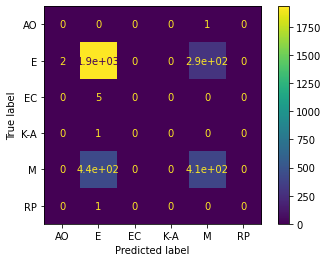

In [15]:
# Confusion matrix
y_pred = dt.predict(X_test)

from sklearn import metrics
cf = metrics.confusion_matrix(y_test, y_pred)
print(cf)

import matplotlib.pyplot as plt
metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()

In [16]:
# Accuracy on test partition
print('Accuracy =', metrics.accuracy_score(y_test, y_pred))

Accuracy = 0.7607282184655396


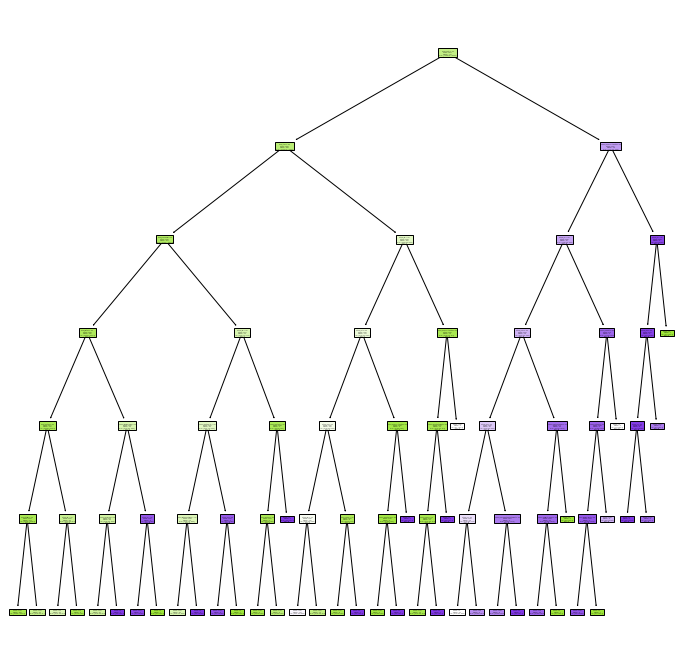

In [17]:
dt = DecisionTreeClassifier(max_depth=6, criterion="entropy", random_state=2020)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

fn = X.columns

from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
classList = list(map(str,dt.classes_.tolist()))
a = tree.plot_tree(dt, feature_names=fn, class_names=classList, filled=True)
plt.show()

In [18]:
# Top 3 most important factors in my decision tree for determining rating
imp = pd.DataFrame(zip(X_train.columns, dt.feature_importances_)).sort_values(by=[1],ascending = False)
imp.head()

,0,1
25,Genre_Shooter,0.301041
17,Genre_Action,0.198737
24,Genre_Role-Playing,0.084208
2,Platform_DS,0.068567
19,Genre_Fighting,0.058842


# 2nd Model: Bagging
Hyperparameters:

Base estimator = DecisionTreeClassifier

n_estimators = 10

random_state = 42

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

cart = DecisionTreeClassifier()
model_bagging = BaggingClassifier(base_estimator=cart, n_estimators=10, random_state=42)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)

print(' Accuracy =', acc_bagging)

 Accuracy = 0.7756827048114434


# 3rd Model: Random Forest
Constructor arguments:

n_estimators = 100, max_features = 7 and random_state = 42

In [20]:
from sklearn.metrics import (classification_report,recall_score,precision_score,accuracy_score)

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, max_features=7, random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predict_rf)

print(accuracy_rf)

0.7727568270481144


In [21]:
# Top 3 most important factors in Random Forest for determining rating
feature_importances = model_rf.feature_importances_
features = imp = pd.DataFrame(zip(X_train.columns, model_rf.feature_importances_)).sort_values(by=[1],ascending=False)
features.head()

,0,1
25,Genre_Shooter,0.096790
27,Genre_Sports,0.050155
17,Genre_Action,0.049149
2,Platform_DS,0.033036
23,Genre_Racing,0.028637


# 4th Model: Boosting

In [22]:
from sklearn.ensemble import AdaBoostClassifier

base_est = DecisionTreeClassifier(max_depth=4)
ada_boost1 = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=0.05)
ada_boost1.fit(X_train, y_train)
res1 = round(accuracy_score(y_test, ada_boost1.predict(X_test)),4)

print('MODEL Accurcay:\t {}'.format(res1))

MODEL Accurcay:	 0.7263


In [23]:
# Top 3 most important factors in Boosting for determining rating
feature_importances1 = ada_boost1.feature_importances_
features1 = pd.DataFrame(zip(X_train.columns, ada_boost1.feature_importances_)).sort_values(by=[1],ascending=False)
features1.head()

,0,1
5,Platform_PC,0.089881
25,Genre_Shooter,0.078809
28,Genre_Strategy,0.073662
71,Publisher_Black Bean Games,0.061309
17,Genre_Action,0.046424


# 5. Voting Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

rfClf = RandomForestClassifier(n_estimators=200, random_state=0) 
dtClf = DecisionTreeClassifier(max_depth=4)
svmClf = SVC(probability=True, random_state=0)
logClf = LogisticRegression(random_state=0)

# constructing the ensemble classifier by mentioning the individual classifiers.
clf2 = VotingClassifier(estimators = [('rf',rfClf), ('dt',dtClf), ('svm',svmClf), ('log', logClf)], voting='soft') 

# train the ensemble classifier
clf2.fit(X_train, y_train)

clf2_pred = clf2.predict(X_test)
print('Accuracy score', accuracy_score(y_test, clf2_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy score 0.7870611183355006


# Cross Validation
Now, we are going to use cross validation to fine tune the model’s parameters

In [29]:
from sklearn.model_selection import cross_val_score

cv = np.mean(cross_val_score(model_rf, X_train, y_train, cv=10))
print(cv)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.7703443627308152


# Simplifying the Model
Using L1 regularization

In [26]:
# prevent overfitting the data
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, 0.1, 1])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
reg.coef_

array([0.5, 0. ])

In [28]:
reg.intercept_

0.20000000000000004